## Necessary Imports

In [1]:
import pandas as pd
import src.visualization as vis
import importlib
importlib.reload(vis)
from matplotlib import pyplot as plt
import seaborn as sns
pal = sns.color_palette()

## Reading All The Data

In [2]:
data = pd.read_csv('../../data/raw_data/data.csv')

In [3]:
print(data)

            id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
404346  404346  789792  789793   
404347  404347  789794  789795   
404348  404348  789796  789797   
404349  404349  789798  789799   
404350  404350  789800  789801   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
404346  How many keywords are there in the Racket prog...   
404347          Do you believe there is life after death?   
404348                                  Wh

## Questions Analysis

#### Questions Extraction

In [4]:
data.fillna('', inplace=True)
data.question1 = data.question1.astype(str)
data.question2 = data.question2.astype(str)

In [5]:
# Combine qid1 and question1 into a new DataFrame
df_q1 = data[['qid1', 'question1']].rename(columns={'qid1': 'qid','question1':'question'})

# Combine qid2 and question2 into a new DataFrame
df_q2 = data[['qid2', 'question2']].rename(columns={'qid2': 'qid','question2':'question'})

# Concatenate the two DataFrames
df_questions = pd.concat([df_q1, df_q2], axis=0)

# Drop duplicates
df_questions = df_questions.drop_duplicates()

# Reset index
df_questions = df_questions.reset_index(drop=True)

In [6]:
df_questions['length'] = df_questions['question'].apply(lambda x: len(x))
df_questions['word_count'] = df_questions['question'].apply(lambda x: len(x.split()))

In [7]:
print(df_questions)

           qid                                           question  length  \
0            1  What is the step by step guide to invest in sh...      66   
1            3  What is the story of Kohinoor (Koh-i-Noor) Dia...      51   
2            5  How can I increase the speed of my internet co...      73   
3            7  Why am I mentally very lonely? How can I solve...      50   
4            9  Which one dissolve in water quikly sugar, salt...      76   
...        ...                                                ...     ...   
803494  789793  How many keywords are there in PERL Programmin...      79   
803495  789795         Is it true that there is life after death?      42   
803496  789797                                  What's this coin?      17   
803497  789799  I am having little hairfall problem but I want...     127   
803498  789801      What is it like to have sex with your cousin?      45   

        word_count  
0               14  
1                8  
2           

In [8]:
df_questions.to_csv("../../data/raw_data/questions.csv")

#### Questions Analysis

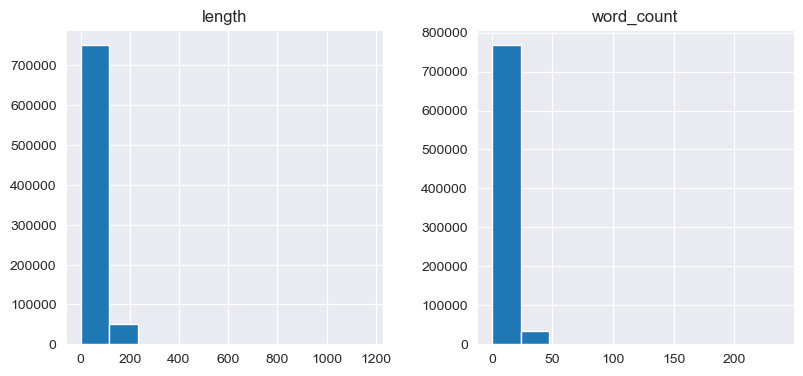

In [9]:
vis.histPlotAll(df_questions[["length","word_count"]])

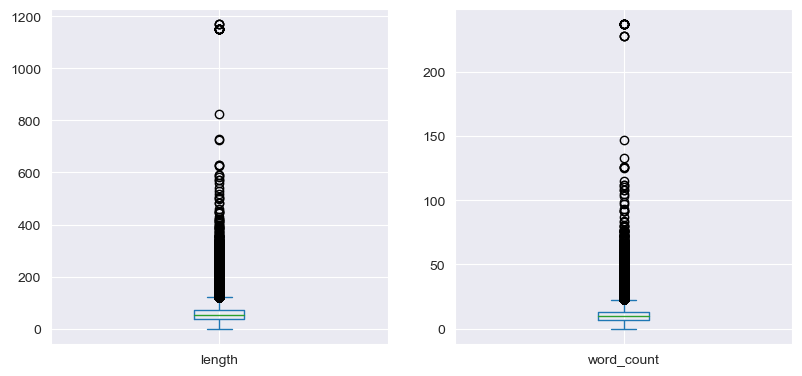

In [10]:
vis.boxPlotAll(df_questions[["length","word_count"]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean 59.88 std 32.01 max 1169.00 


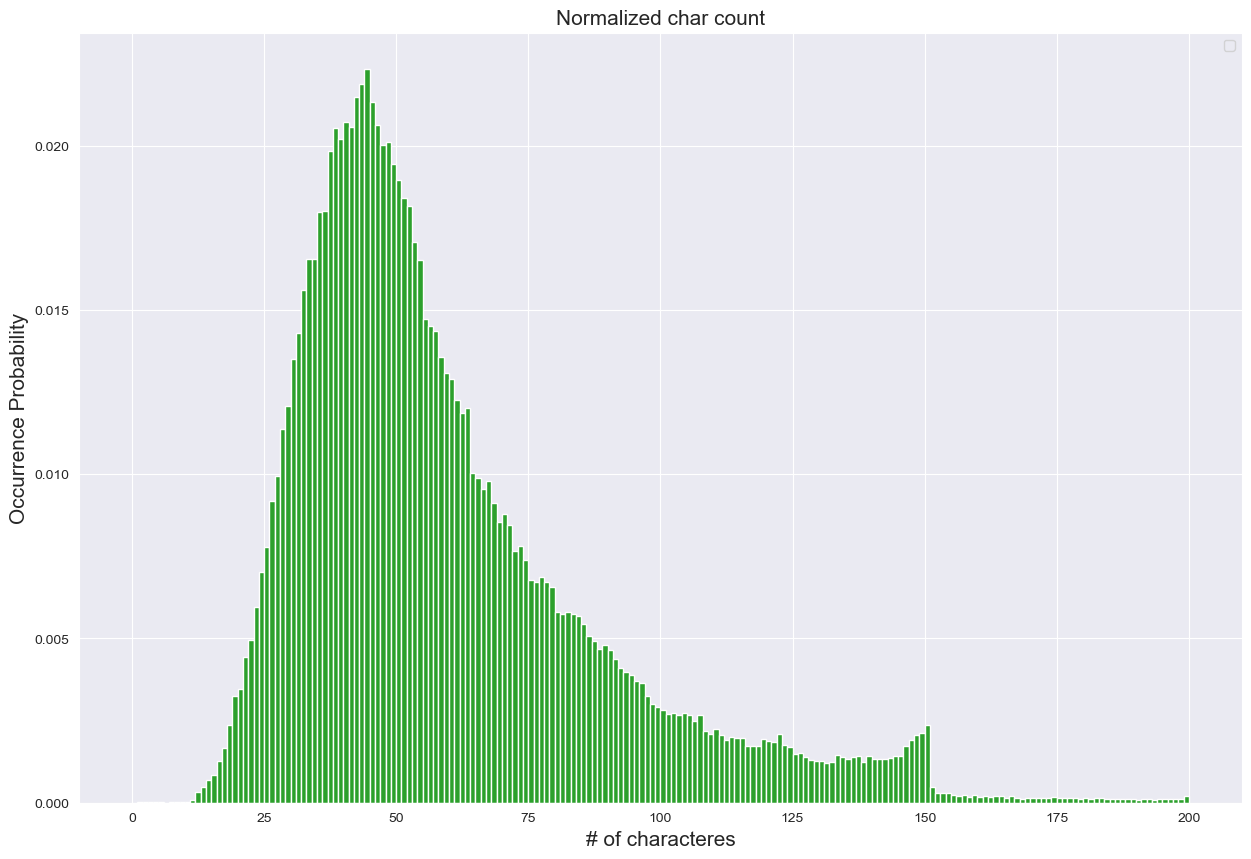

In [11]:
pairs_qs = pd.Series(df_questions['question'].fillna('').tolist()).astype(str)
dist = pairs_qs.apply(len)

plt.figure(figsize=(15, 10))
plt.hist(dist, bins=200, range=[0, 200], color=pal[2],  density=True)
plt.title('Normalized char count', fontsize=15)
plt.legend()
plt.xlabel('# of characteres', fontsize=15)
plt.ylabel('Occurrence Probability', fontsize=15)

print('mean {:.2f} std {:.2f} max {:.2f} '.format(dist.mean(), dist.std(), dist.max()))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean 11.08 std 5.90 max 237.00 


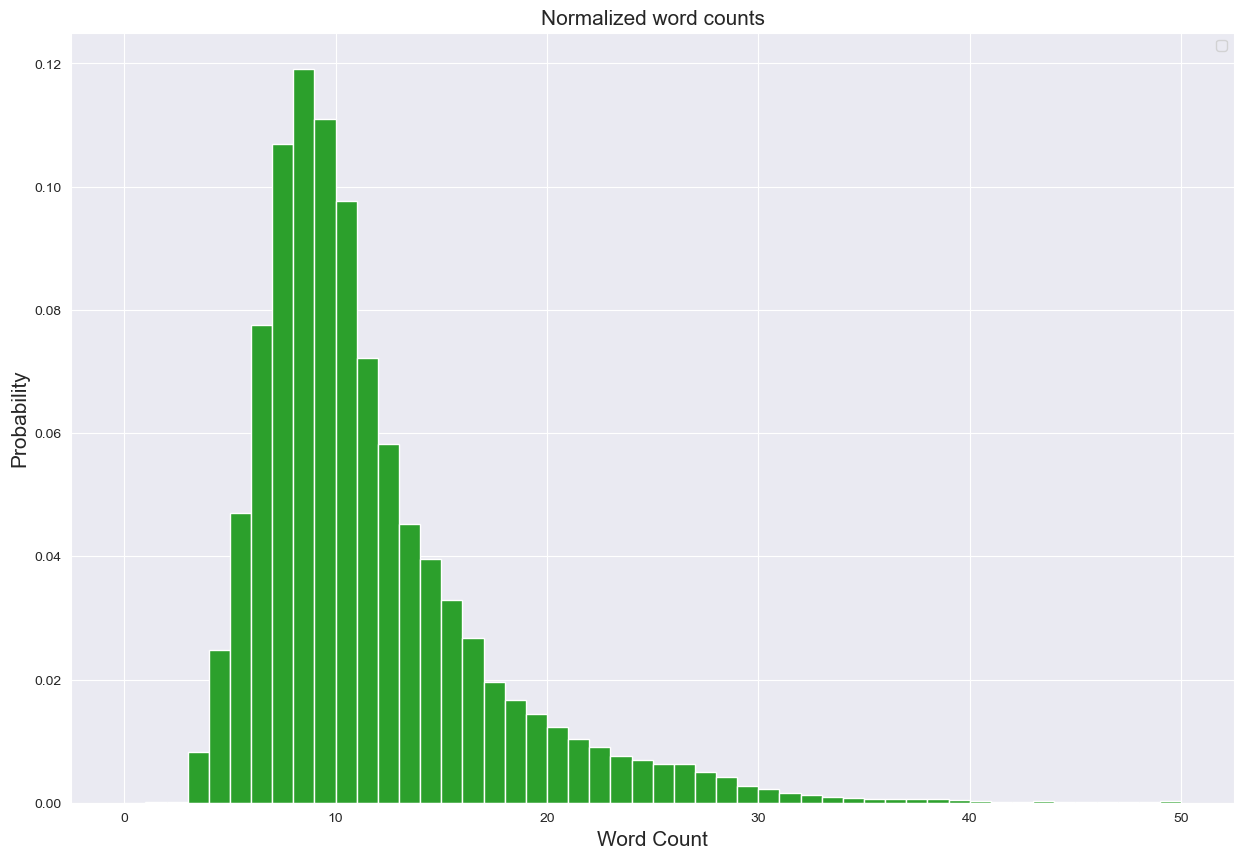

In [12]:
dist_words = pairs_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_words, bins=50, range=[0, 50], color=pal[2], density=True)
plt.title('Normalized word counts', fontsize=15)
plt.legend()
plt.xlabel('Word Count', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean {:.2f} std {:.2f} max {:.2f} '.format(dist_words.mean(), dist_words.std(), dist_words.max()))

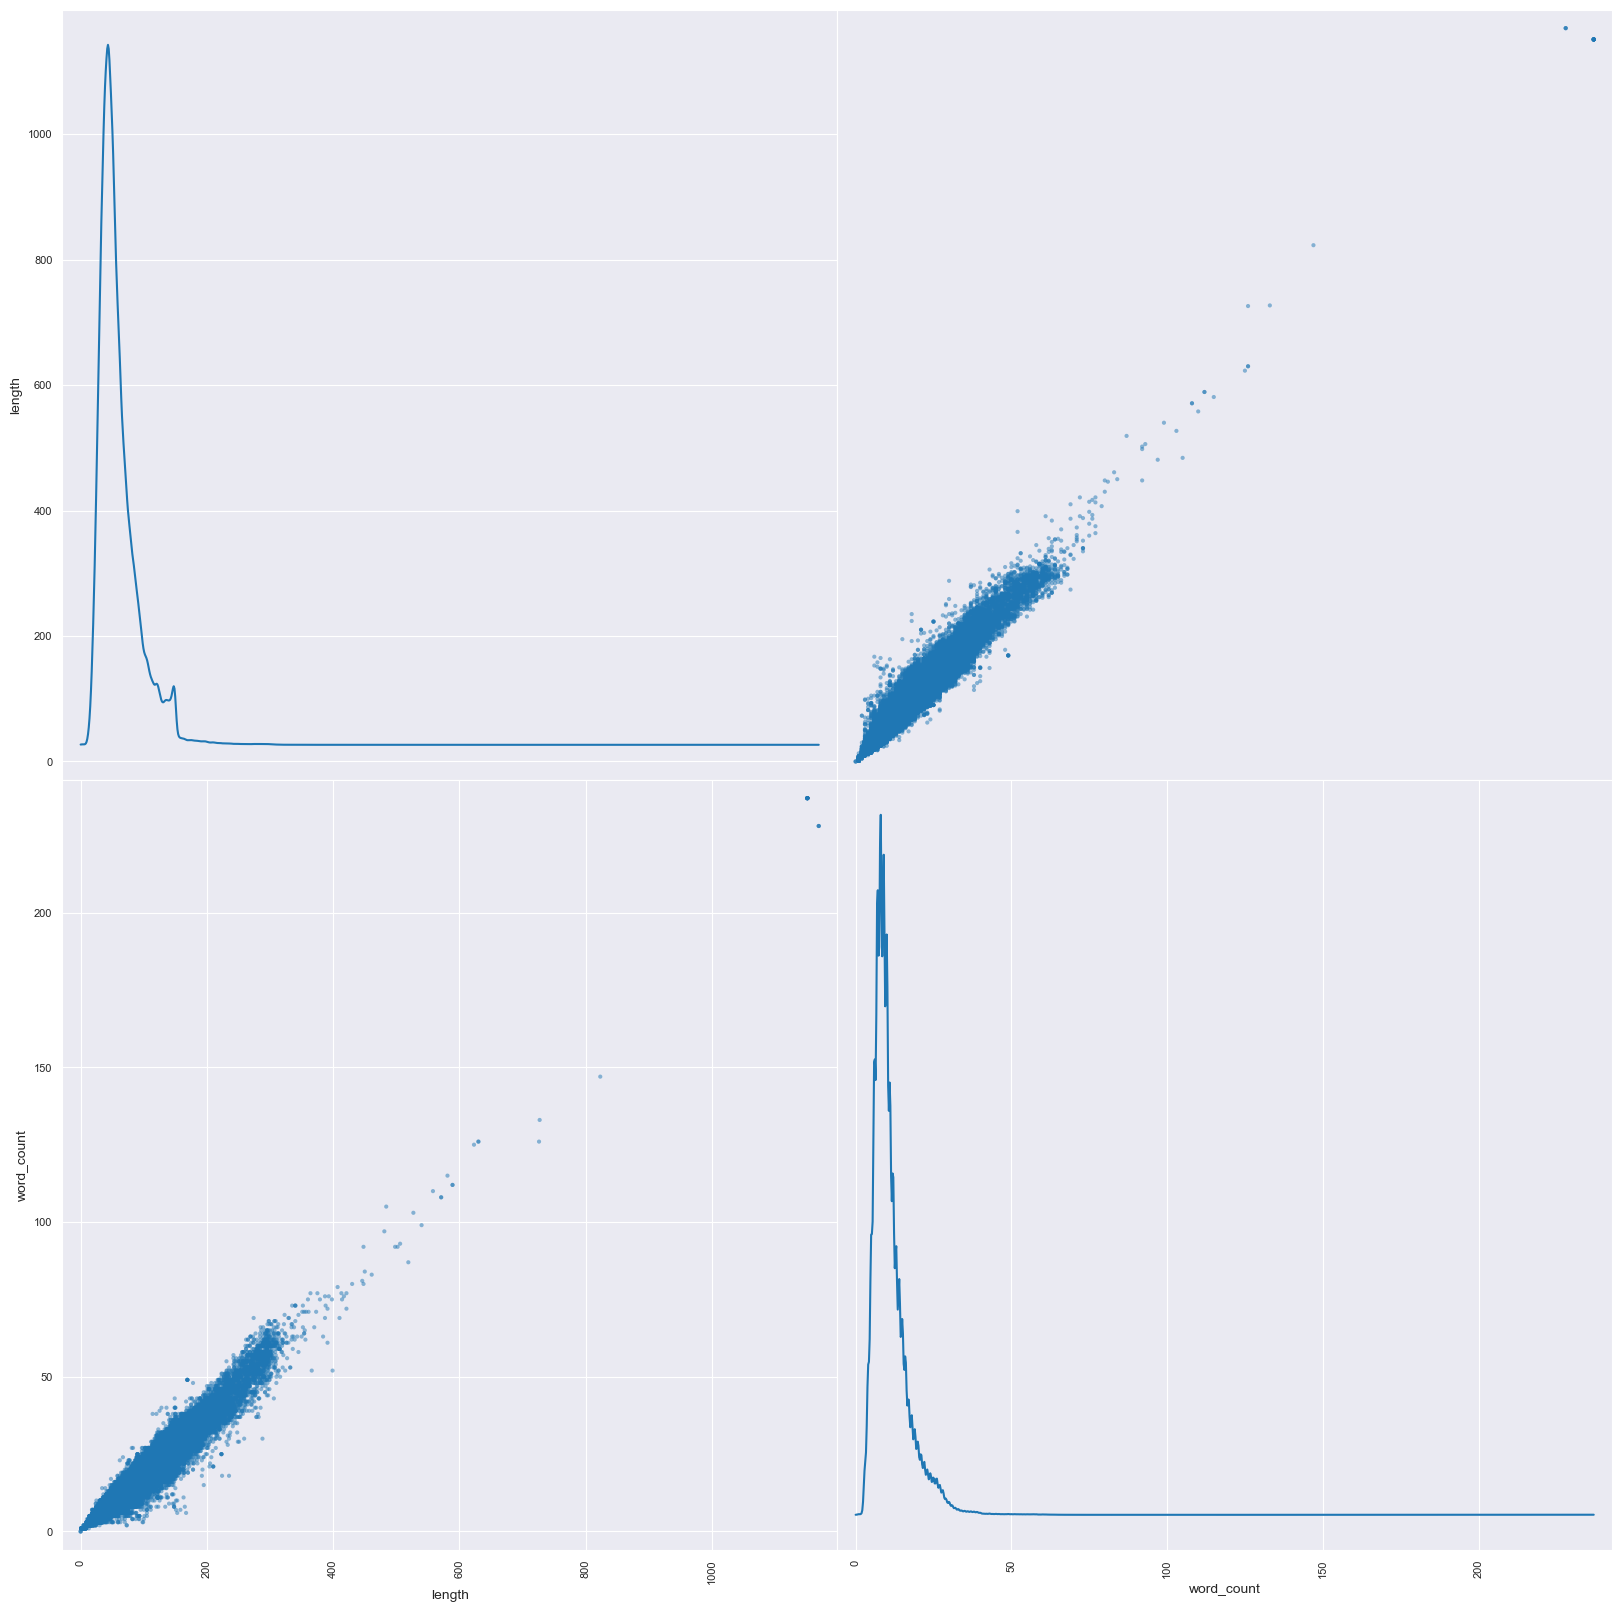

In [13]:
vis.scatterMatrix(df_questions[["length","word_count"]])